In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import matplotlib.cm as cm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

In [2]:
# convert files found at http://yann.lecun.com/exdb/mnist/ to csv format
def convert_to_csv(image_file, label_file, output_file, n):
    f = open(image_file, "rb")
    o = open(output_file, "w")
    l = open(label_file, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

In [3]:
# convert training set to csv files
convert_to_csv("train-images-idx3-ubyte", "train-labels-idx1-ubyte",
        "mnist_train.csv", 60000)

In [4]:
# read csv files to dataframe and as a matrix in order to later visualize each digit
df_train = pd.read_csv('mnist_train.csv', header=None).as_matrix()
df_train

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [5]:
# split data into the image data and the label data (X_train, y_train)
X_train=df_train[:,1:]
y_train=df_train[:,0]

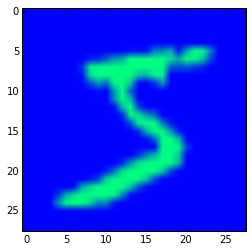

In [6]:
# let us visualize one of the digits from the data we have
# example of a digit e.g. digit with index 0 which as defined by its label is number 5
digit0=X_train[0]
digit0.shape=(28,28)
plt.imshow(digit0,cmap=cm.winter)

In [7]:
# convert test set to csv files
convert_to_csv("t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte",
        "mnist_test.csv", 10000)


In [10]:
# read image data (training and testing) as vector in order to train a classifier
df_train = pd.read_csv('mnist_train.csv', header=None)
df_test = pd.read_csv('mnist_test.csv', header=None)

X_train=df_train[df_train.columns[1:]]
y_train=df_train[df_train.columns[0]]

In [8]:
# use a multi layer perceptron with 1 hidden layer with 800 units to train our model
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(800,), random_state=1)
clf.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(800,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [11]:
# define test set from related dataframe
X_test=df_test[df_test.columns[1:]]
y_test=df_test[df_test.columns[0]]

In [12]:
# use our classifier to predict the digit and print the accuracy score of the classification
y_pred=clf.predict(X_test)
clf.score(X_test,y_test)

0.9705

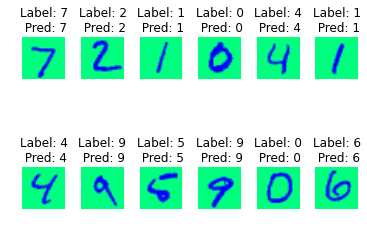

In [13]:
# just to visualize the accuracy of prediction of our model 
# let us visualize 12 digit examples and see whether their labels were correctly predicted
df_test = pd.read_csv('mnist_test.csv', header=None).as_matrix()
X_test=df_test[:,1:]
y_test=df_test[:,0]

for index,(image,label_true,label_pred) in enumerate(list(zip(X_test[:12],y_test[:12],y_pred[:12]))):
    
    plt.subplot(2, 6, index + 1)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.axis('off')
    digit=image
    digit.shape=(28,28)
    plt.imshow(255-digit,cmap=cm.winter)
    plt.title('Label: %i \n Pred: %i'  % (label_true,label_pred))